In [6]:
pip install scikeras

In [7]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import cv2
import random
import pickle
import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import optimizers
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix

%matplotlib inline


In [8]:
def plot_results(mod_history, metric, epochs):
      
      # Check out our train loss and test loss over epochs.
      train_metric = mod_history.history[metric]
      val = 'val_' + metric
      test_metric = mod_history.history[val]

      # Set figure size.
      plt.figure(figsize=(12, 8))

      # Generate line plot of training, testing loss over epochs.
      plt.plot(train_metric, label=f'Training {metric}', color='#185fad')
      plt.plot(test_metric, label=f'Testing {metric}', color='orange')

      # Set title
      plt.title(f'Training and Testing {metric} by Epoch', fontsize = 25)
      plt.xlabel('Epoch', fontsize = 18)
      plt.ylabel('Categorical Crossentropy', fontsize = 18)
      plt.xticks(range(0,epochs,5), range(0,epochs,5))
      plt.legend(fontsize = 18);

In [9]:
def make_predictions(mod_name, steps=20):
    preds = mod_name.predict(X_test,steps=steps)
    preds = preds.argmax(axis=-1)

    y_test_labels = np.argmax(y_test, axis=-1)

    cm = confusion_matrix(y_test_labels,preds)

    plot_confusion_matrix(cm, cm_plot_labels, normalize=True,
                          title='Face Shape Normalized')

    plt.show()



In [10]:
cm_plot_labels = ['Heart','Oblong','Oval','Round', 'Square']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [11]:
def plot_summary_results(mod_name, mod_history, epochs):
    plot_results(mod_history, 'loss',epochs)
    plot_results(mod_history, 'accuracy', epochs)
    make_predictions(mod_name)

In [12]:
path = "C:/Users/whisn/FaceShape Dataset/data/"

# Pastikan path dan nama file digabung dengan benar
X_train = np.asarray(pickle.load(open(path + "X_train_rgb.pickle", "rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_rgb.pickle", "rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_rgb.pickle", "rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_rgb.pickle", "rb")))

In [13]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (3999, 224, 224, 3)
y_train shape (3999, 5)
--------------------
X_test shape (1000, 224, 224, 3)
y_test shape (1000, 5)


In [14]:
pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to c:\users\whisn\appdata\local\temp\pip-req-build-fjgrj0hy
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras_vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8379 sha256=bd91e990ff9fc98f0affc7f68dfbaf4a627c69103a161fdacb2f0330edb5015b
  Stored in directory: C:\Users\whisn\AppData\Local\Temp\pip-ephem-wheel-cache-6ejjbivg\wheels\24\2b\7a\ef35f1e8c2a0ba6dd6d680eecd50522759b6e4b6170b700084
Successfully built keras_vggface
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git 'C:\Users\whisn\AppData\Local\Temp\pip-req-build-fjgrj0hy'


In [15]:
# Path for VGGFace weights

path_vggface = 'C:/Users/whisn/FaceShape Dataset/saved_models/rcmalli_vggface_tf_notop_vgg16.h5'

In [16]:
# Loading VGG16 as base model

base_model = VGG16(input_shape=(224, 224, 3),  # same as our input
                   include_top=False,  # exclude the last layer
                   weights=path_vggface)  # use VGGFace Weights

In [17]:
for layer in base_model.layers:
  layer.trainable = False

In [18]:
model_t1 = Sequential()

In [19]:
# Compile and Fit the model

x = layers.Flatten()(base_model.output)

x = layers.Dense(64, activation='relu')(x)  # add 1 fully connected layer, try with 512 first 
x = layers.Dropout(0.5)(x)
x = layers.Dense(5, activation='softmax')(x)  # add final layer

model_t1 = tf.keras.models.Model(base_model.input, x)



model_t1.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

model_t1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,320,709 (62.26 MB)

 Trainable params: 1,606,021 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

In [21]:
datagen.fit(X_train)

In [29]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [26]:
# Memastikan penggunaan GPU jika tersedia
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')


In [32]:
# Use only a subset of data for initial experiments
X_train_subset = X_train[:5000]
y_train_subset = y_train[:5000]

history_t1 = model_t1.fit(
    datagen.flow(X_train_subset, y_train_subset, batch_size=32),
    steps_per_epoch=int(len(X_train_subset) / 32),
    epochs=5,
    validation_data=(X_test, y_test)
)


Epoch 1/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 759s 6s/step - accuracy: 0.5980 - loss: 1.0716 - val_accuracy: 0.7160 - val_loss: 0.7559
Epoch 2/5
  1/124 ━━━━━━━━━━━━━━━━━━━━ 9:35 5s/step - accuracy: 0.6875 - loss: 0.7426

C:\Users\whisn\New folder\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


124/124 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.6875 - loss: 0.7426 - val_accuracy: 0.7180 - val_loss: 0.7542
Epoch 3/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 767s 6s/step - accuracy: 0.7061 - loss: 0.7764 - val_accuracy: 0.7640 - val_loss: 0.6527
Epoch 4/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.5938 - loss: 1.0927 - val_accuracy: 0.7670 - val_loss: 0.6498
Epoch 5/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 798s 6s/step - accuracy: 0.7608 - loss: 0.6588 - val_accuracy: 0.7660 - val_loss: 0.6130


In [36]:
folder_path = 'C:/Users/whisn/FaceShape Dataset/saved_models/'
filename = 'vgg16-face-1.keras'

# Gabungkan folder dan nama file
model_path = folder_path + filename

# Simpan model
tf.keras.models.save_model(
    model_t1, filepath=model_path, overwrite=True, include_optimizer=True
)


In [40]:
# Lokasi penyimpanan model
folder_path = 'C:/Users/whisn/FaceShape Dataset/saved_models/'
filename = 'vgg16-face-1.keras'
model_path = folder_path + filename

# Simpan model
tf.keras.models.save_model(
    model_t1, filepath=model_path, overwrite=True, include_optimizer=True
)

# Cek apakah file berhasil disimpan
if os.path.exists(model_path):
    print(f"Model berhasil disimpan: {model_path}")
else:
    print(f"Gagal menyimpan model di: {model_path}")

# Muat model
loaded_model = tf.keras.models.load_model(model_path)

# Prediksi
mod_t1_predict = np.argmax(model_t1.predict(X_test), axis=1)
loaded_t1_predict = np.argmax(loaded_model.predict(X_test), axis=1)

# Bandingkan prediksi
print(f'Difference in predictions: Saved model vs. original model is {np.sum(loaded_t1_predict - mod_t1_predict)}\nModel was correctly saved.')


Model berhasil disimpan: C:/Users/whisn/FaceShape Dataset/saved_models/vgg16-face-1.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 165s 5s/step
Difference in predictions: Saved model vs. original model is 0
Model was correctly saved.


20/20 ━━━━━━━━━━━━━━━━━━━━ 148s 7s/step
Normalized confusion matrix
[[0.595 0.06  0.215 0.06  0.07 ]
 [0.03  0.86  0.09  0.015 0.005]
 [0.03  0.025 0.715 0.17  0.06 ]
 [0.01  0.005 0.06  0.86  0.065]
 [0.01  0.03  0.065 0.095 0.8  ]]


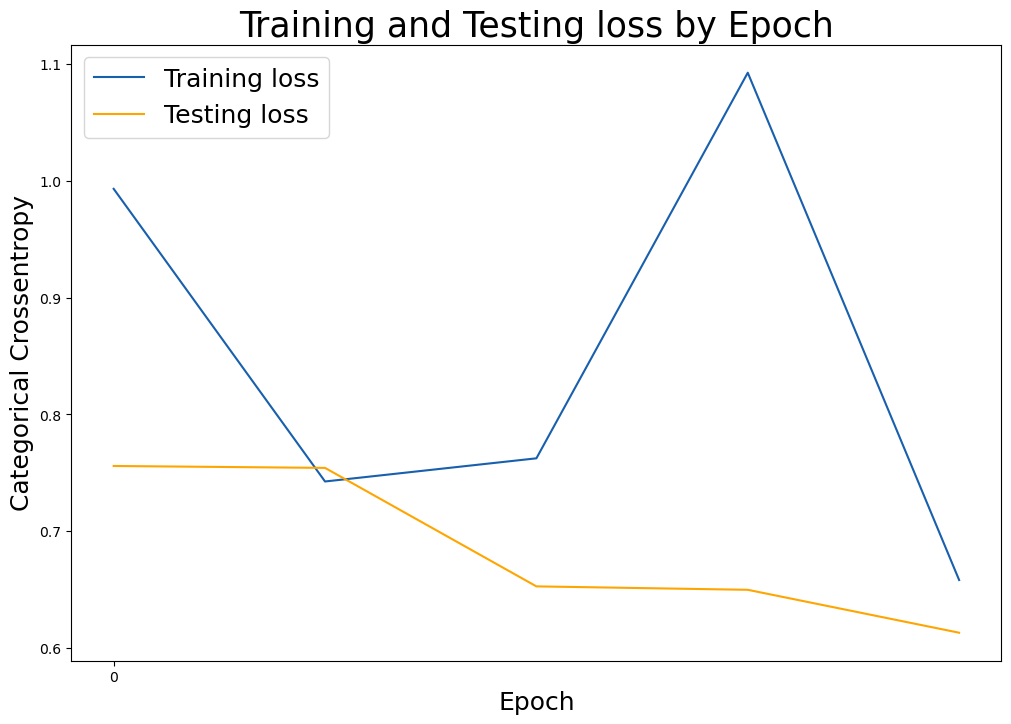

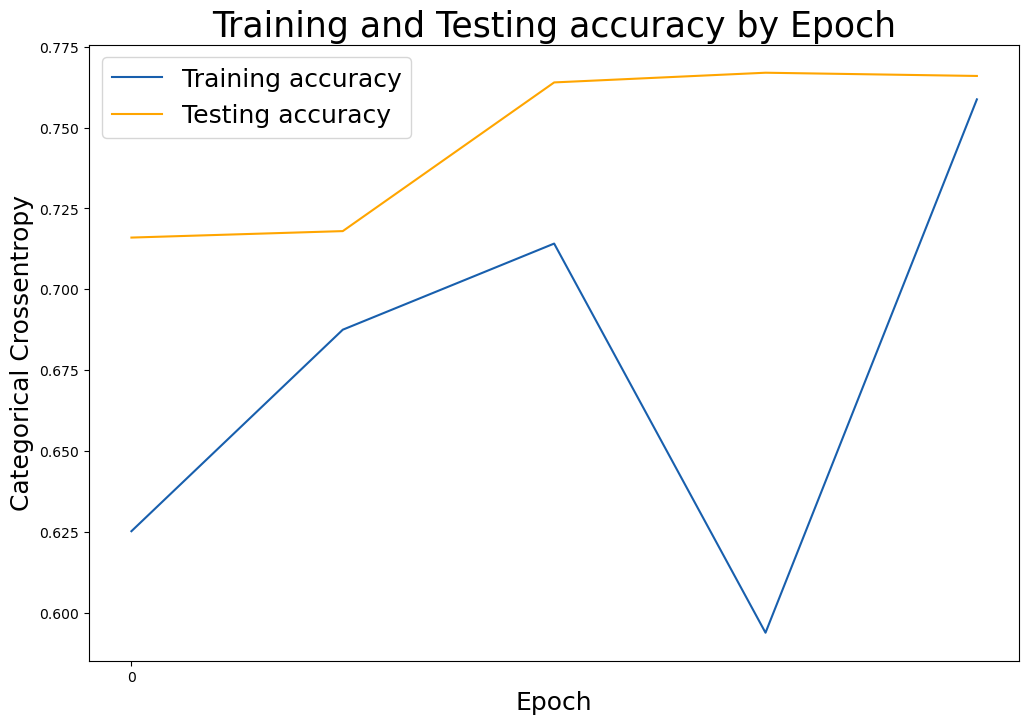

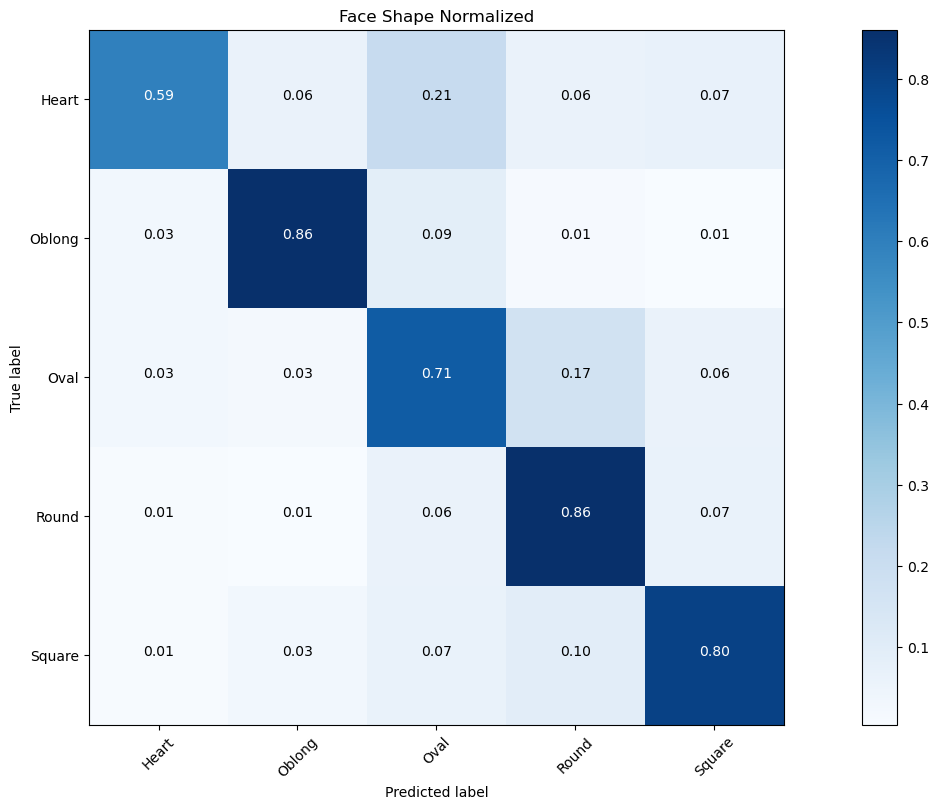

In [41]:
plot_summary_results(model_t1, history_t1, 5)

In [46]:
# Use only a subset of data for initial experiments
X_train_subset = X_train[:5000]
y_train_subset = y_train[:5000]

history_t2 = model_t1.fit(
    datagen.flow(X_train_subset, y_train_subset, batch_size=32),
    steps_per_epoch=int(len(X_train_subset) / 32),
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 776s 6s/step - accuracy: 0.7909 - loss: 0.5785 - val_accuracy: 0.7800 - val_loss: 0.5733
Epoch 2/10
  1/124 ━━━━━━━━━━━━━━━━━━━━ 9:40 5s/step - accuracy: 0.7812 - loss: 0.5172

C:\Users\whisn\New folder\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


124/124 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.7812 - loss: 0.5172 - val_accuracy: 0.7850 - val_loss: 0.5633
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 758s 6s/step - accuracy: 0.8171 - loss: 0.5019 - val_accuracy: 0.8090 - val_loss: 0.5174
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.7500 - loss: 0.5953 - val_accuracy: 0.8070 - val_loss: 0.5164
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 758s 6s/step - accuracy: 0.8331 - loss: 0.4674 - val_accuracy: 0.8080 - val_loss: 0.5236
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8125 - loss: 0.4098 - val_accuracy: 0.8100 - val_loss: 0.5225
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 752s 6s/step - accuracy: 0.8405 - loss: 0.4474 - val_accuracy: 0.8360 - val_loss: 0.4666
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8750 - loss: 0.5160 - val_accuracy: 0.8390 - val_loss: 0.4638
Epoch 9/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 750s 6s/step - accuracy: 0.8472 - loss: 0.4023 - val_accuracy: 0.844

In [50]:
# Lokasi penyimpanan model
folder_path = 'C:/Users/whisn/FaceShape Dataset/saved_models/'
filename = 'vgg16-face-2.keras'
model_path = folder_path + filename

# Simpan model
tf.keras.models.save_model(
    model_t1, filepath=model_path, overwrite=True, include_optimizer=True
)

# Cek apakah file berhasil disimpan
if os.path.exists(model_path):
    print(f"Model berhasil disimpan: {model_path}")
else:
    print(f"Gagal menyimpan model di: {model_path}")

# Muat model
loaded_model = tf.keras.models.load_model(model_path)

# Prediksi
mod_t1_predict = np.argmax(model_t1.predict(X_test), axis=1)
loaded_t1_predict = np.argmax(loaded_model.predict(X_test), axis=1)

# Bandingkan prediksi
print(f'Difference in predictions: Saved model vs. original model is {np.sum(loaded_t1_predict - mod_t1_predict)}\nModel was correctly saved.')


Model berhasil disimpan: C:/Users/whisn/FaceShape Dataset/saved_models/vgg16-face-2.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 276s 9s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 277s 9s/step
Difference in predictions: Saved model vs. original model is 0
Model was correctly saved.


20/20 ━━━━━━━━━━━━━━━━━━━━ 275s 14s/step
Normalized confusion matrix
[[0.785 0.03  0.13  0.02  0.035]
 [0.04  0.89  0.07  0.    0.   ]
 [0.035 0.025 0.835 0.08  0.025]
 [0.015 0.    0.07  0.88  0.035]
 [0.03  0.035 0.05  0.075 0.81 ]]


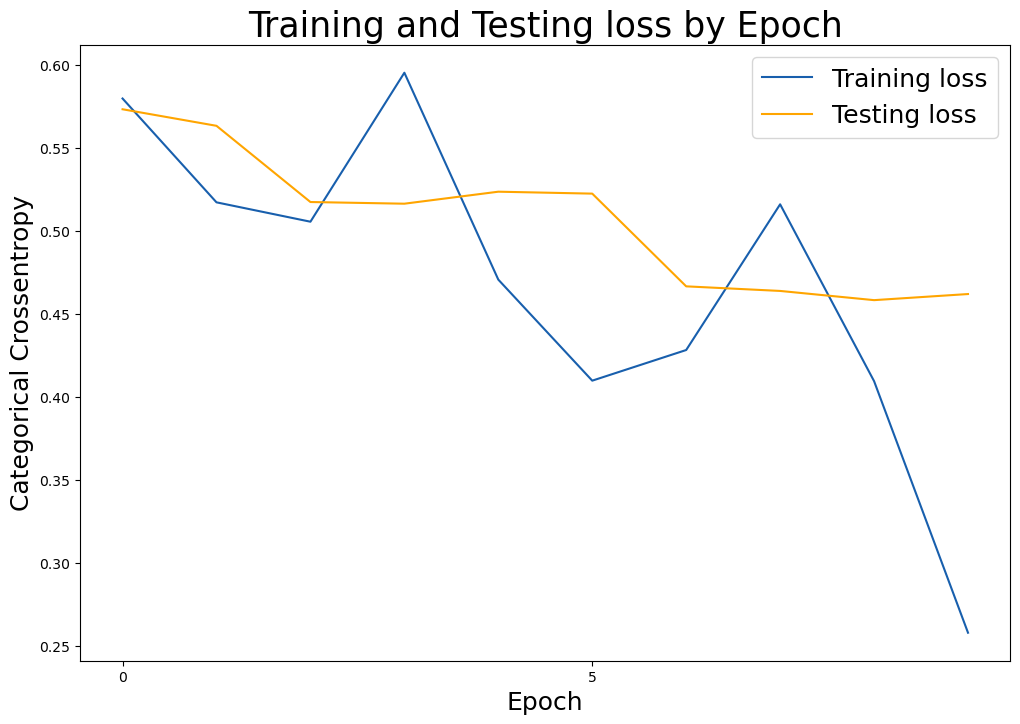

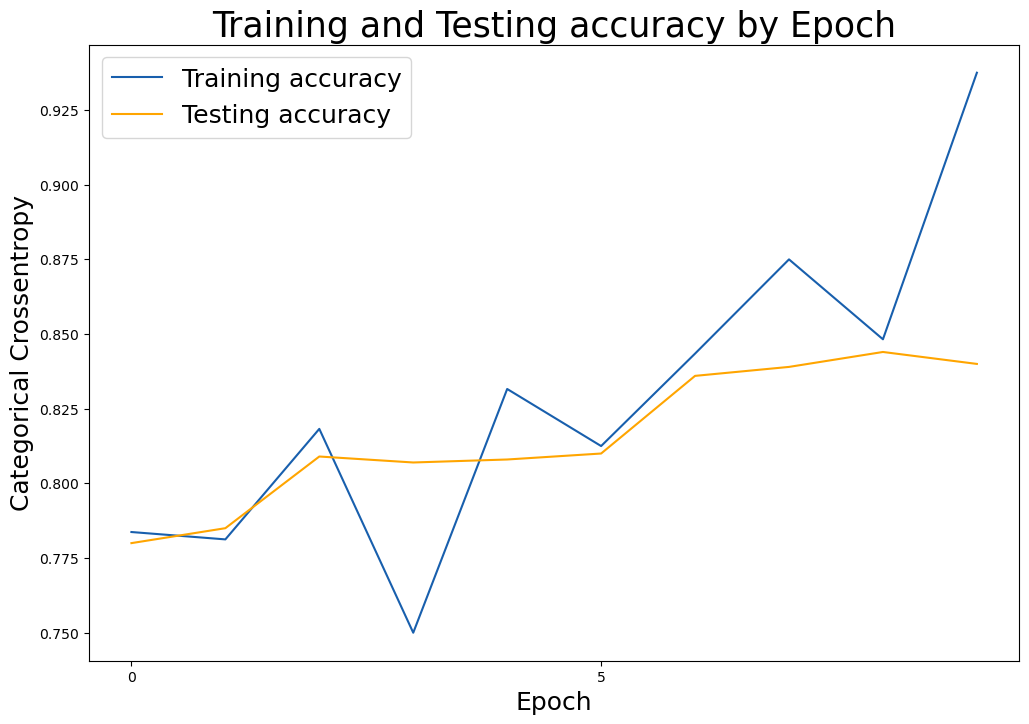

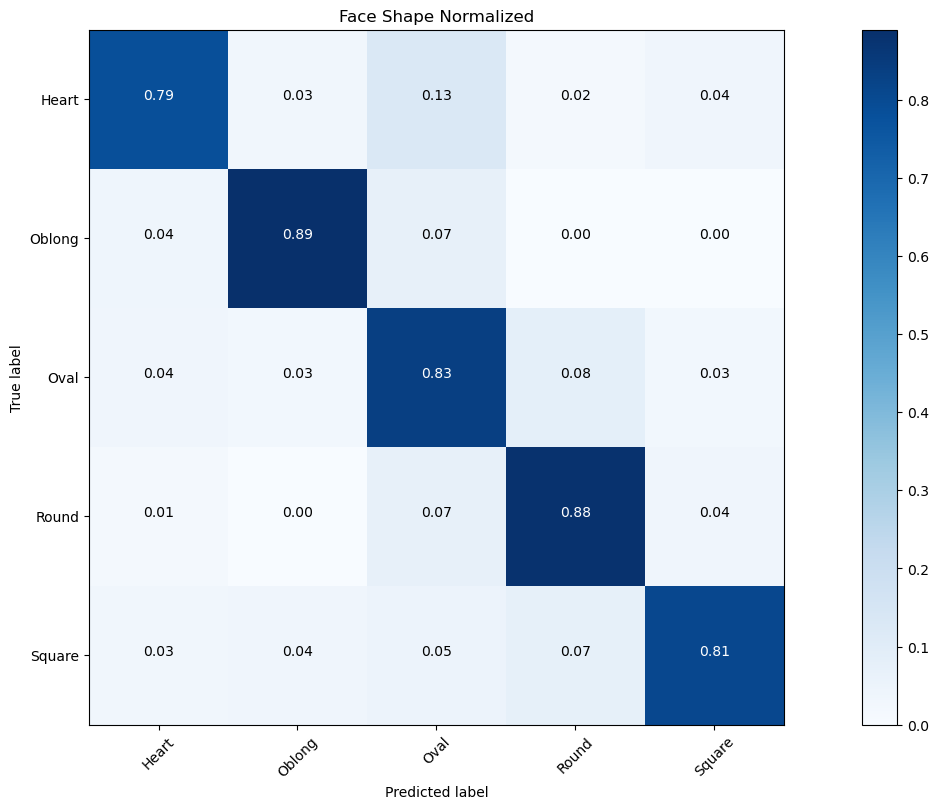

In [51]:
plot_summary_results(model_t1, history_t2, 10)